In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import *
from sklearn.metrics import *

In [62]:
df=pd.read_csv("heart.csv")

In [63]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63    1    3     145     233   1      0       150      0      2.3      0     
1  37    1    2     130     250   0      1       187      0      3.5      0     
2  41    0    1     130     204   0      0       172      0      1.4      2     
3  56    1    1     120     236   0      1       178      0      0.8      2     
4  57    0    0     120     354   0      1       163      1      0.6      2     

   ca  thal  target  
0   0    1      1    
1   0    2      1    
2   0    2      1    
3   0    2      1    
4   0    2      1

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [65]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
# frmo google.colab import drive
# drive.mount('/content/drive')

In [67]:
df.duplicated().sum()

1

In [68]:
df=df.drop_duplicates()
#df.drop_duplicates(inplace=True)

In [69]:
df.duplicated().sum()

0

In [70]:
df.describe()

age         sex         cp       trestbps      chol         fbs     \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

         restecg     thalach      exang      oldpeak      slope        ca      \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

          thal       target    
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [71]:
df['age'].hist(bins=10)

<Axes: >

In [72]:
sns.distplot(df[df['sex']==1]['age'],label='male')
sns.distplot(df[df['sex']==0]['age'],label='female')
plt.legend()

In [73]:
df["age"].skew()

-0.2037432795959691

In [74]:
sns.boxplot(x='chol',data=df)

<Axes: xlabel='age', ylabel='Density'>

In [75]:
df.describe()

age         sex         cp       trestbps      chol         fbs     \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

         restecg     thalach      exang      oldpeak      slope        ca      \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

          thal       target    
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [76]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [77]:
df.head(1)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63    1    3     145     233   1      0       150      0      2.3      0     

   ca  thal  target  
0   0    1      1

In [78]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(17,10))
cat_feat= ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for idx,features in enumerate(cat_feat):
  if features !='target':
    ax=axes[int(idx/4),idx%4] # location (0/4)=0 , 0%4=0 ----> axes[0,0]
    # i1=0
    #i2 =0
    #ax = axes[i1,i2]
    #i1+=i1
    #i2+=i2
    sns.countplot(x=features, hue='target', data=df, ax=ax)

In [79]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63    1    3     145     233   1      0       150      0      2.3      0     
1  37    1    2     130     250   0      1       187      0      3.5      0     
2  41    0    1     130     204   0      0       172      0      1.4      2     
3  56    1    1     120     236   0      1       178      0      0.8      2     
4  57    0    0     120     354   0      1       163      1      0.6      2     

   ca  thal  target  
0   0    1      1    
1   0    2      1    
2   0    2      1    
3   0    2      1    
4   0    2      1

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
cat_feat= ['sex','cp','fbs','restecg','exang','slope','ca','thal']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10) )

axs = axs.flatten()
index = 0
for k,v in enumerate(cat_feat):
    sns.countplot(x=v, data=df, ax= axs[index])
    index+=1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [81]:
df.corr()

age       sex       cp     trestbps    chol       fbs    \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach    exang    oldpeak    slope      ca     \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
ca       -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thal     -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

            thal     target   
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trestbps  0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalach  -0.094910  0.419955  
exang     0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slope    -0.103314  0.343940  
ca        0.160085 -0.408992  
thal      1.000000 -0.343101  
target   -0.343101  1.000000

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

<Axes: >

In [83]:
! pip install autoviz

In [84]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

In [85]:
report=AV.AutoViz(df)

Shape of your Data Set loaded: (302, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variable

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [86]:
!pip install sweetviz

In [87]:
import sweetviz as sv

In [88]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


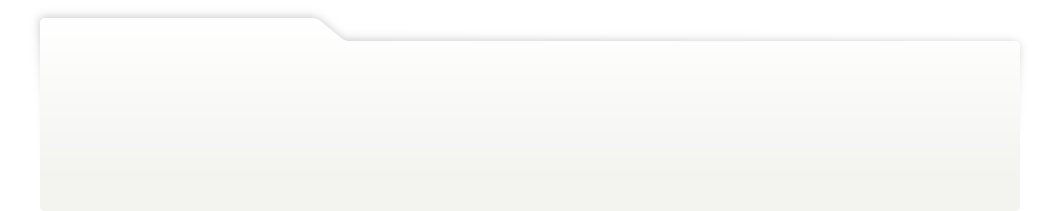
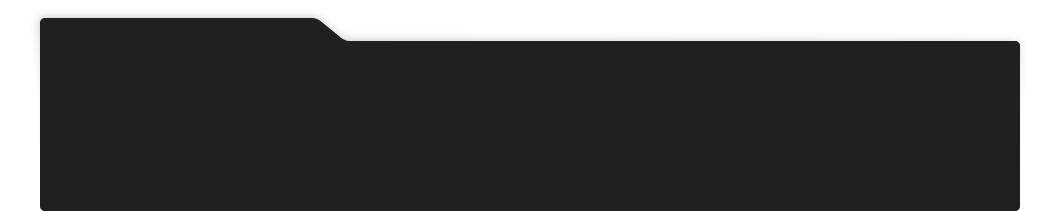
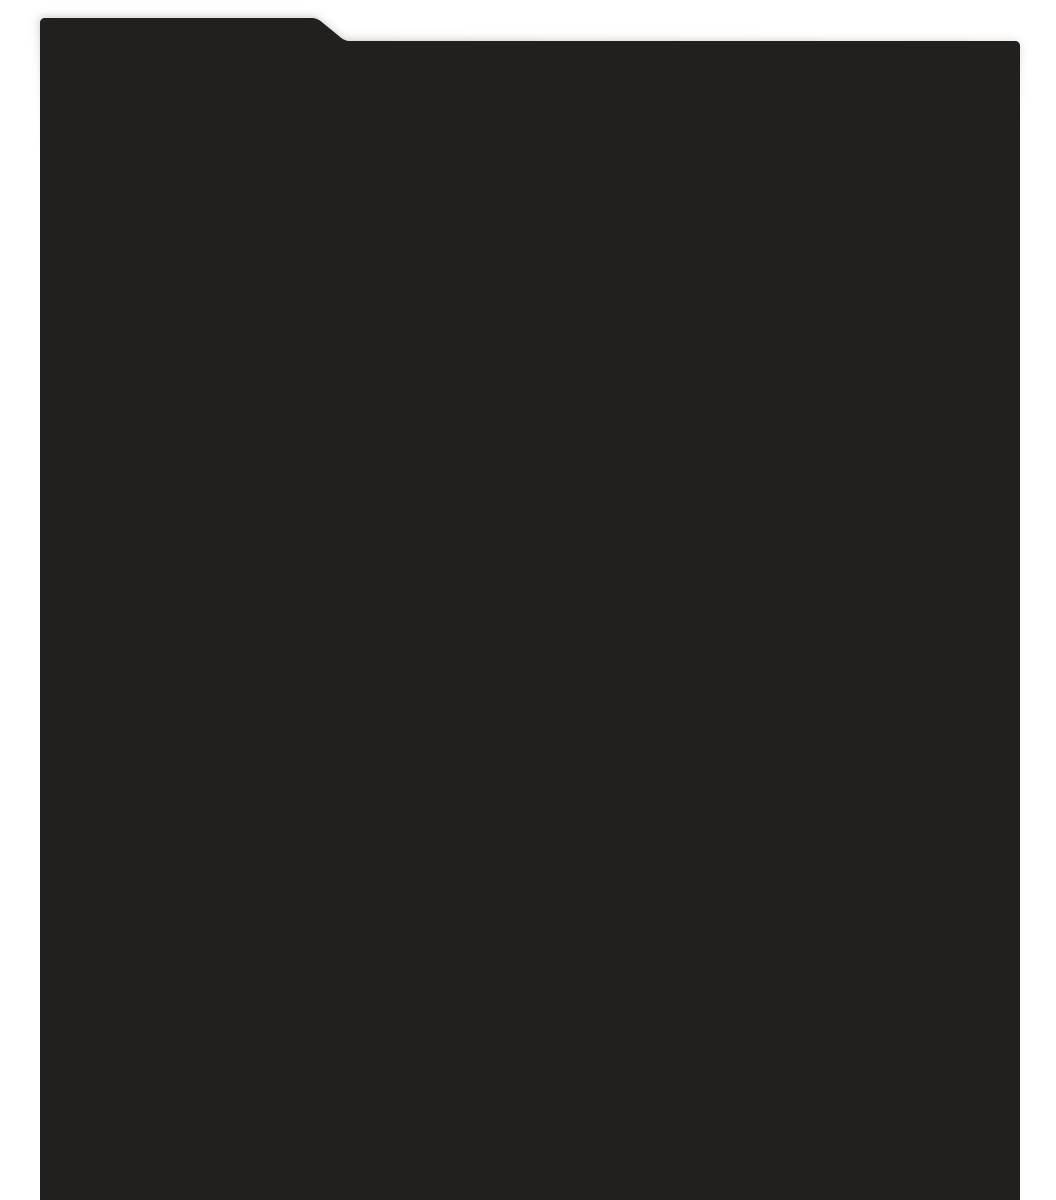
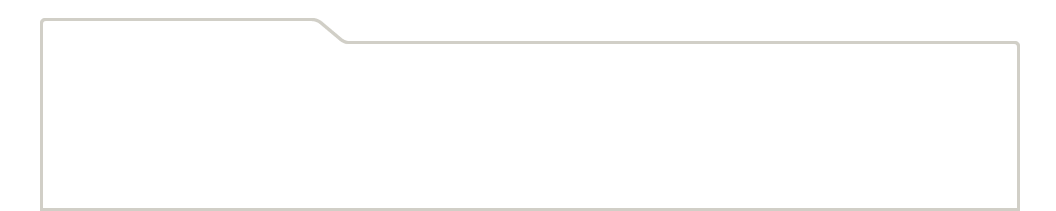
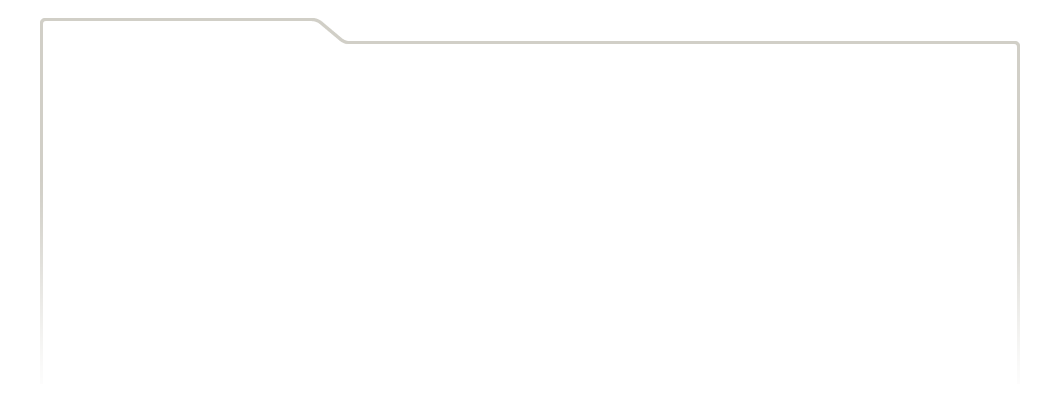
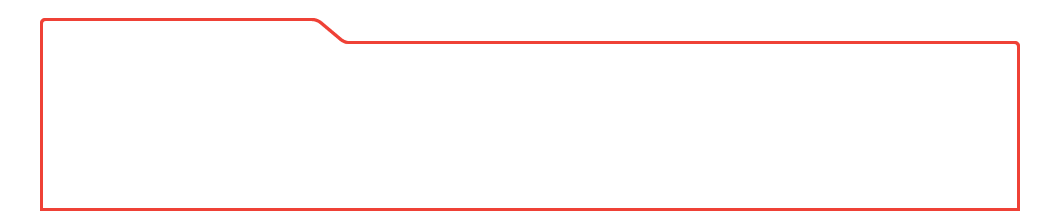
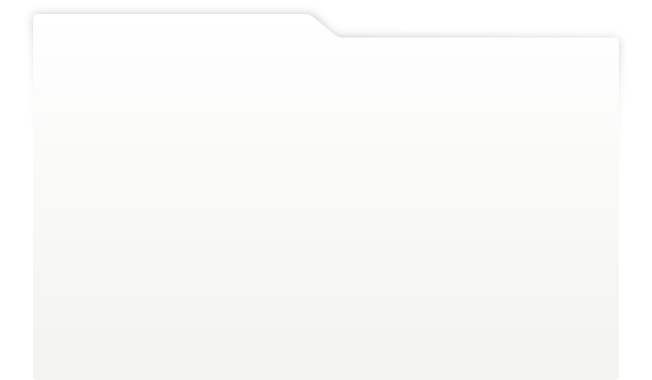
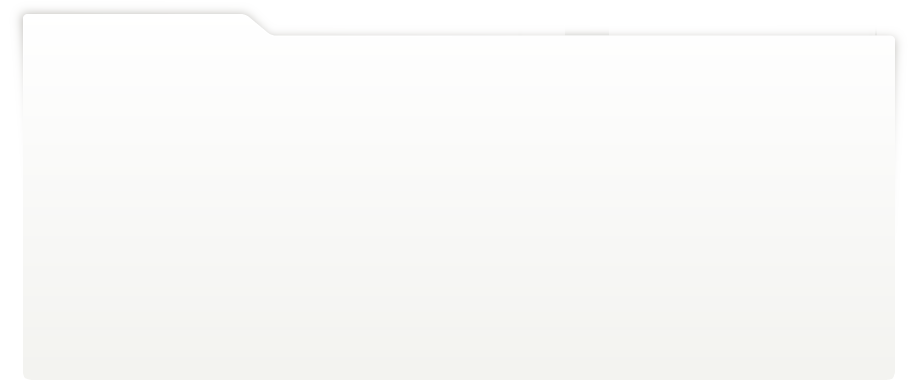
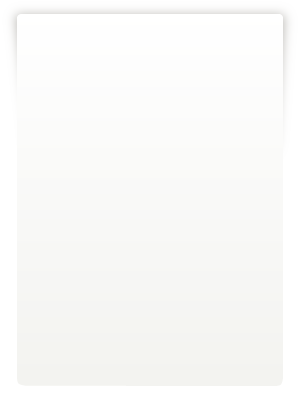
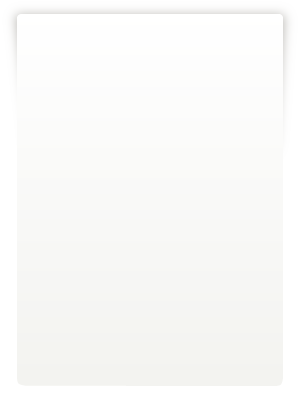
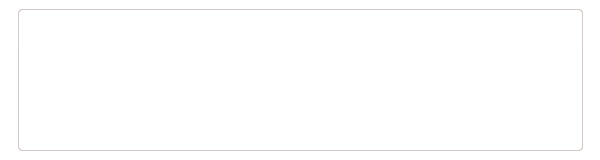
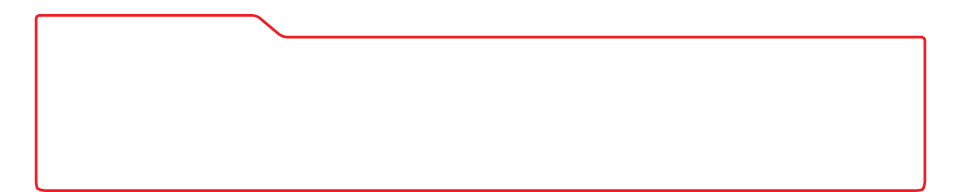
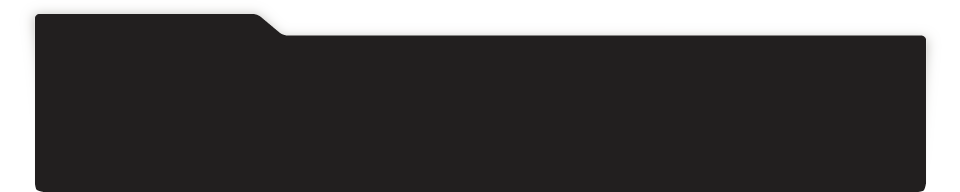
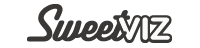
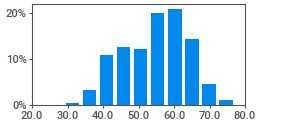
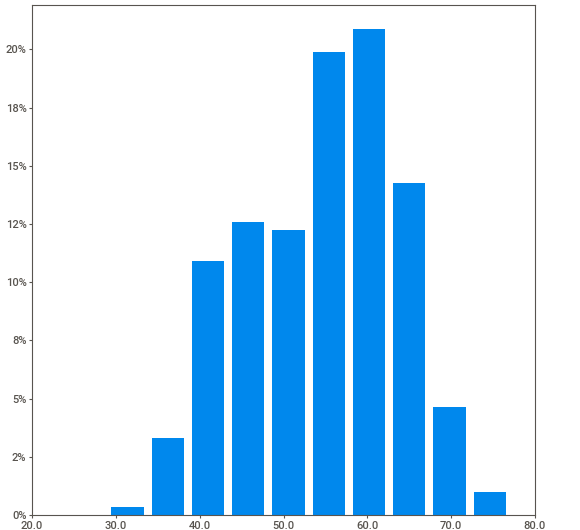
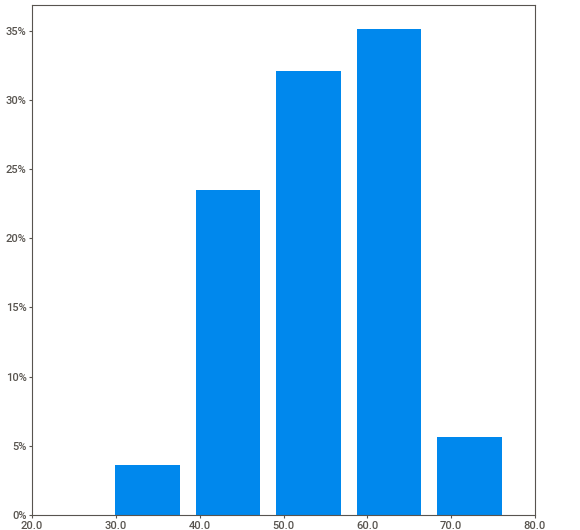
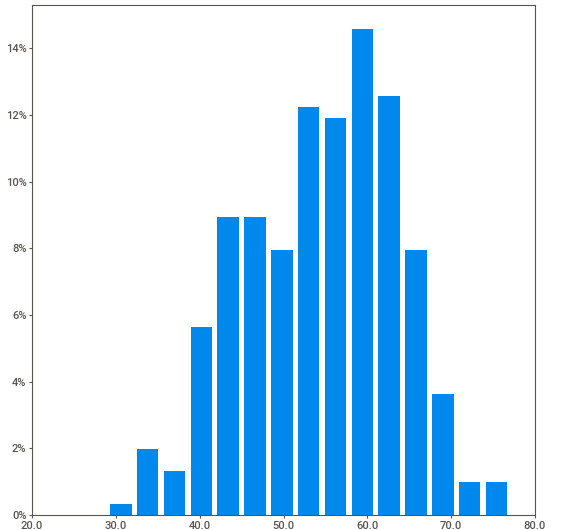
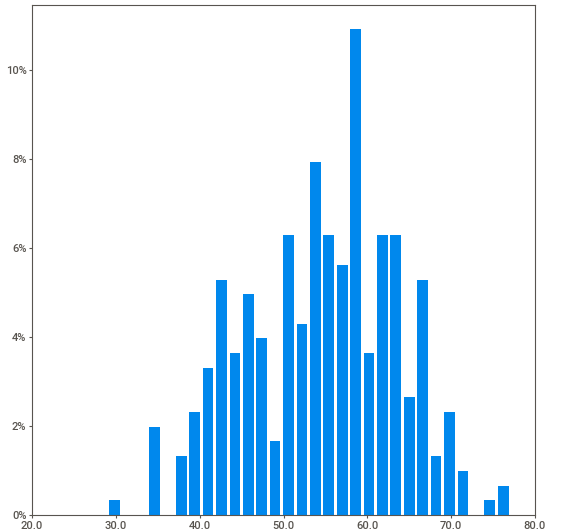
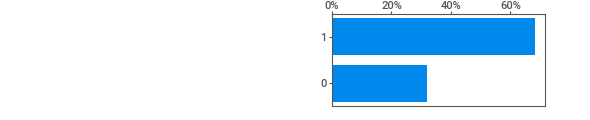
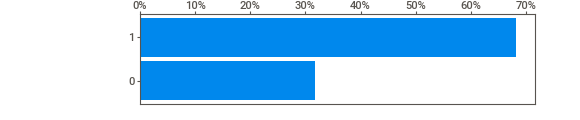
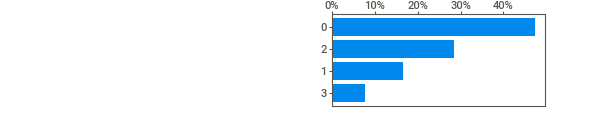
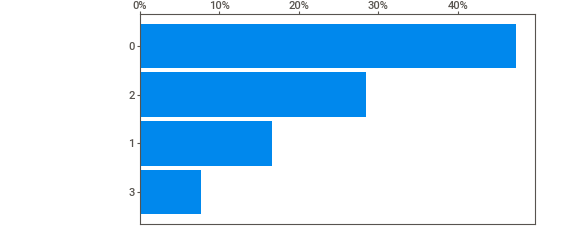
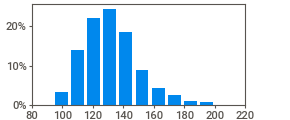
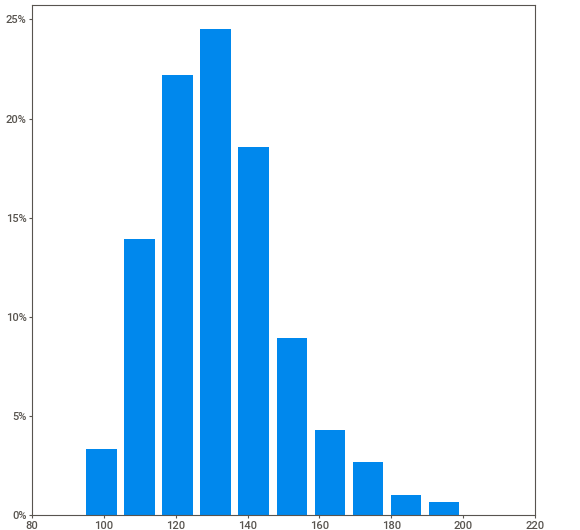
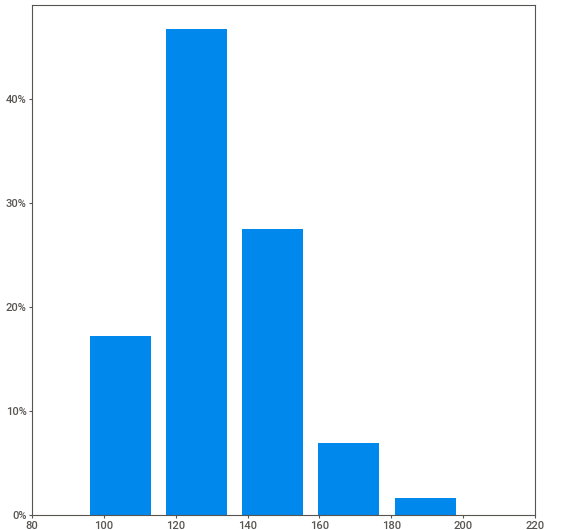
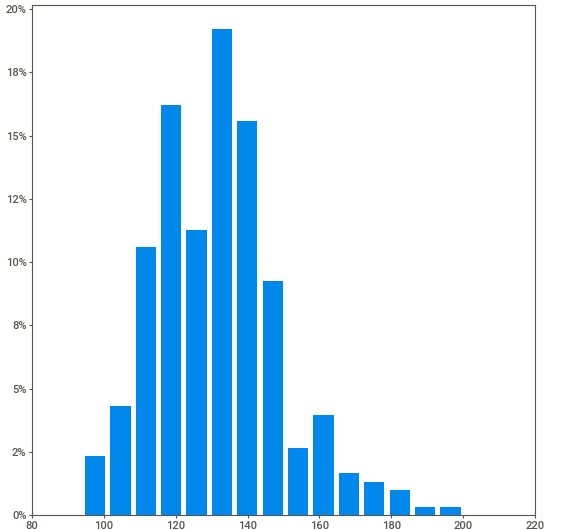
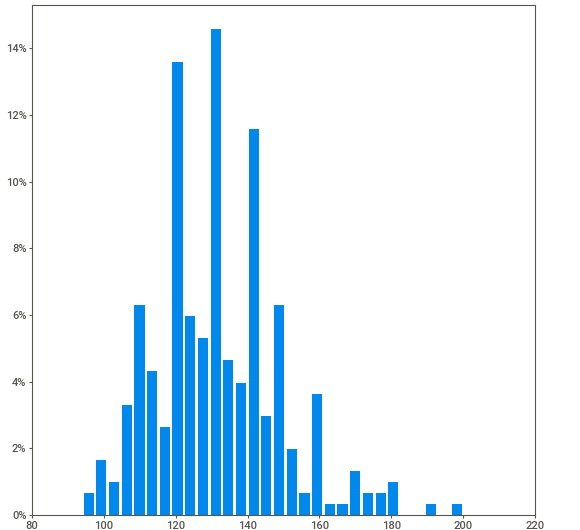
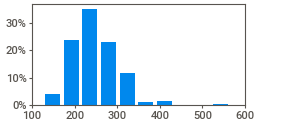
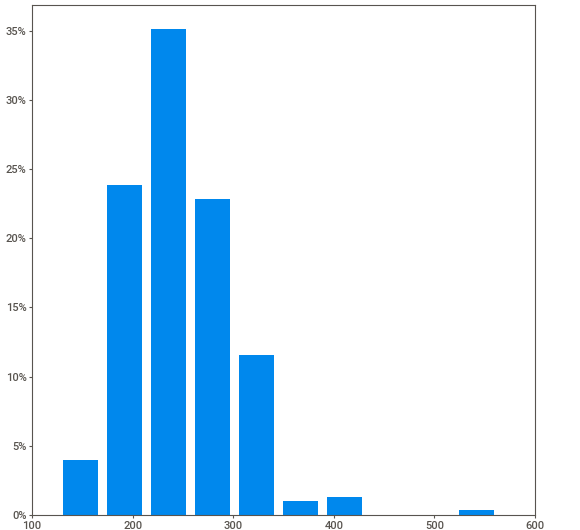
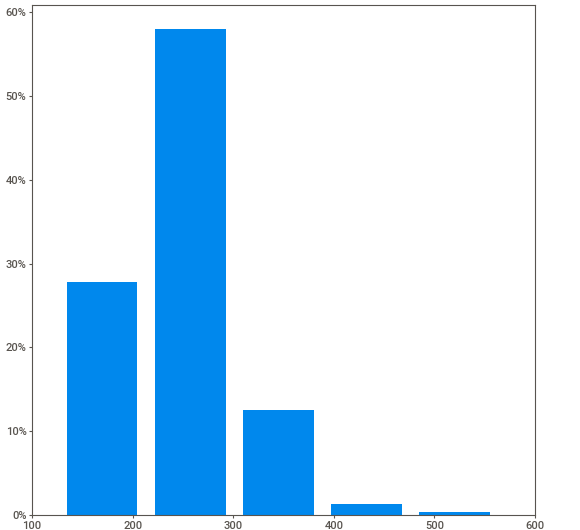
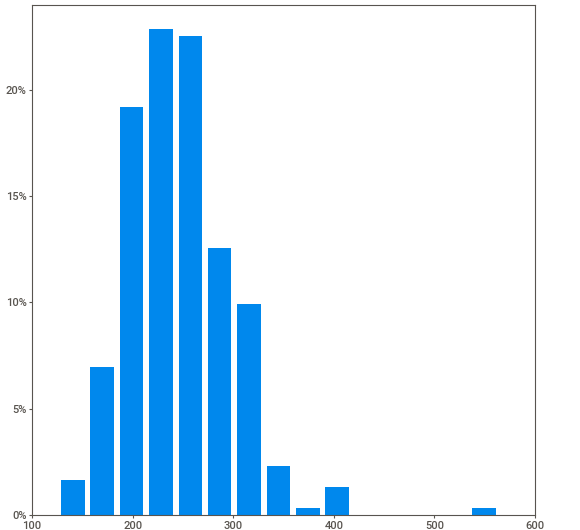
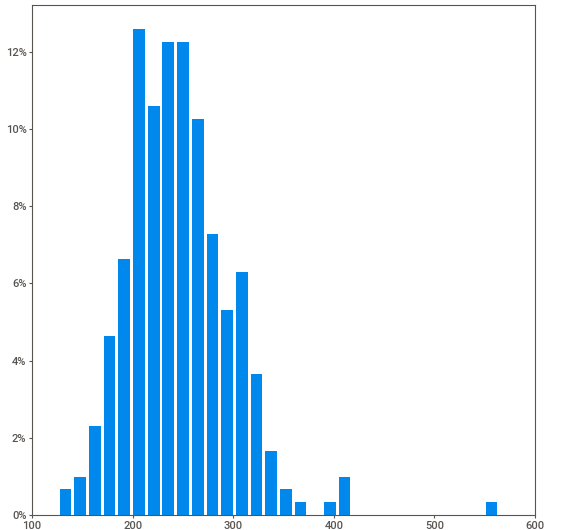
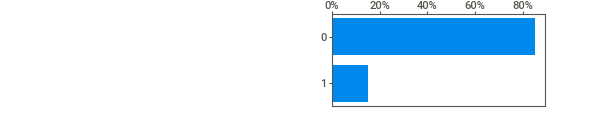
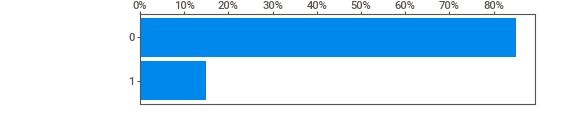
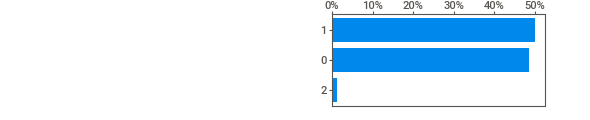
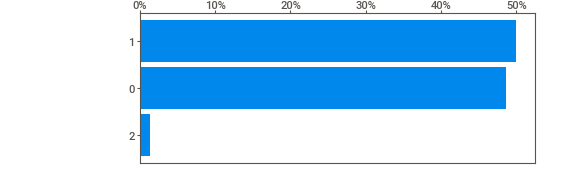
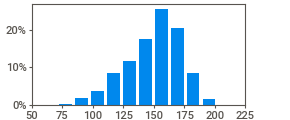
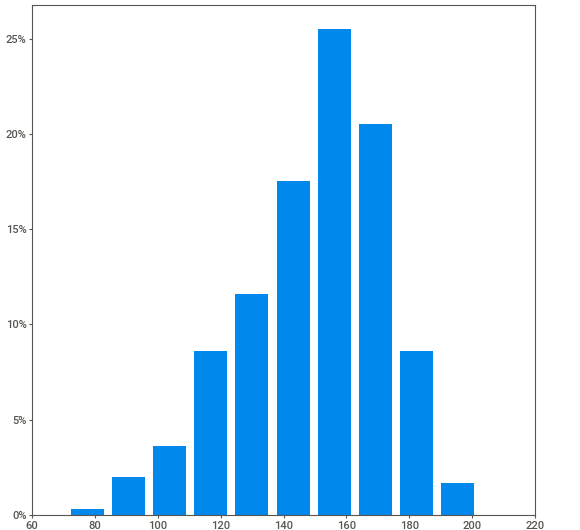
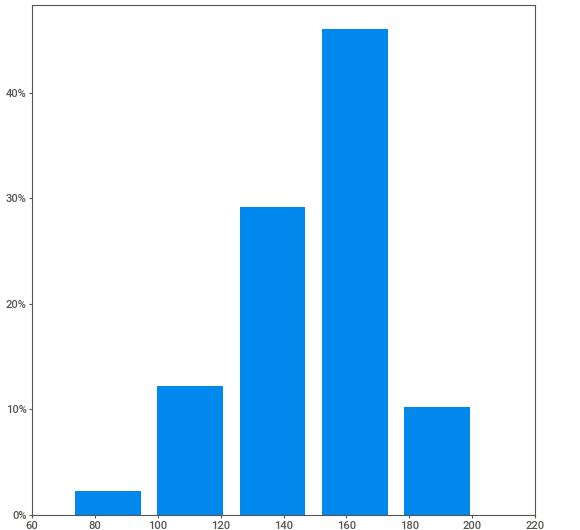
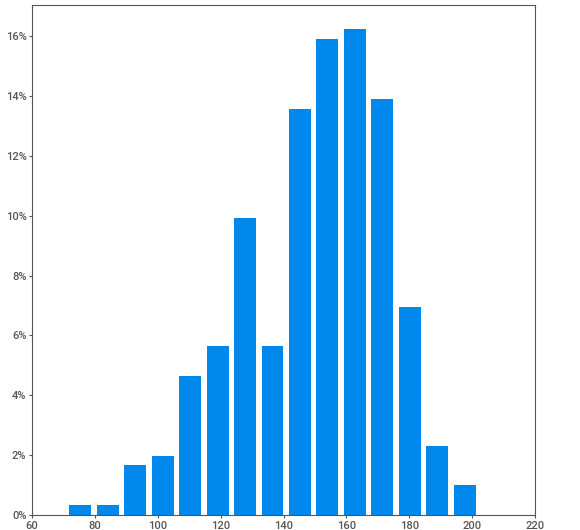
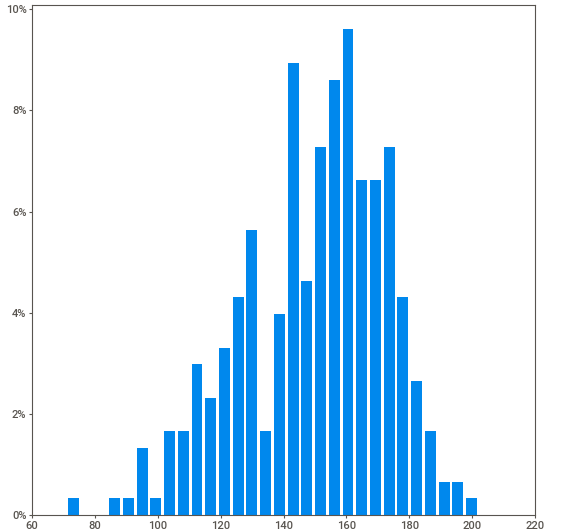
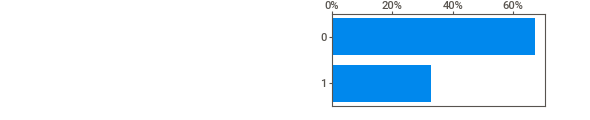
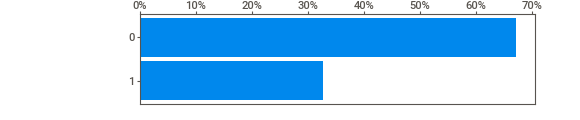
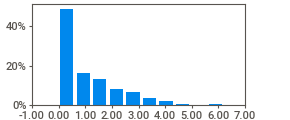
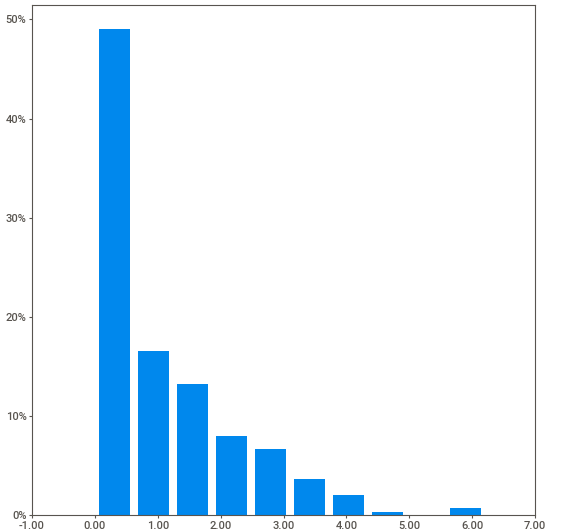
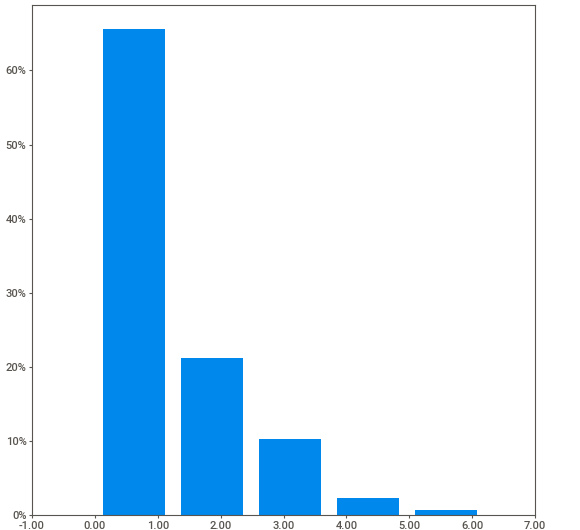
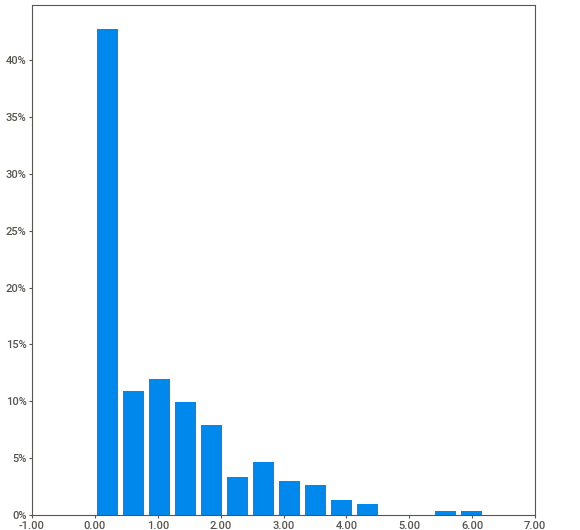
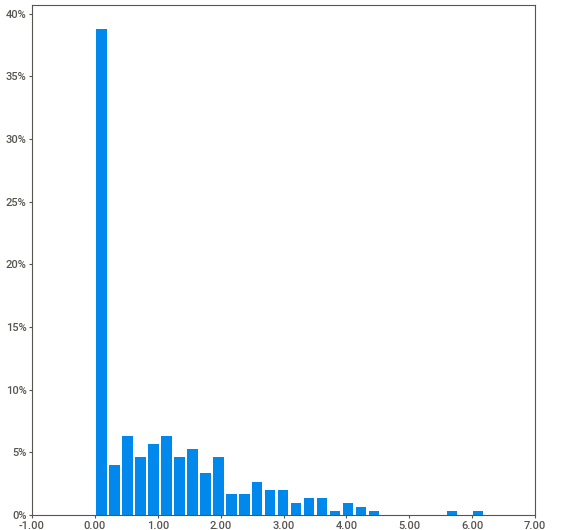
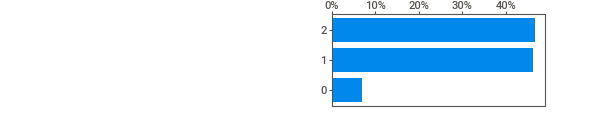
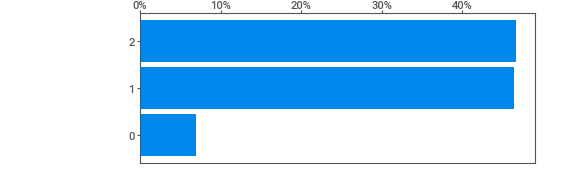
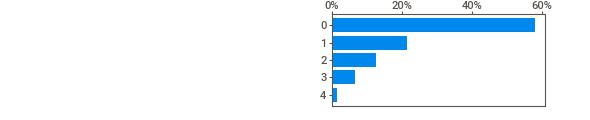
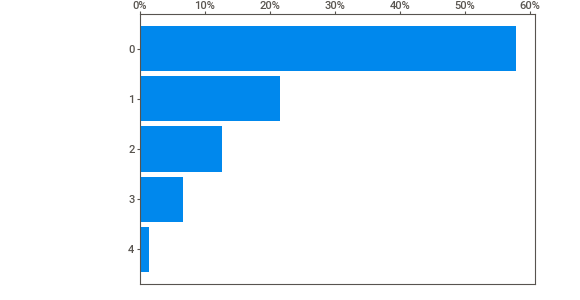
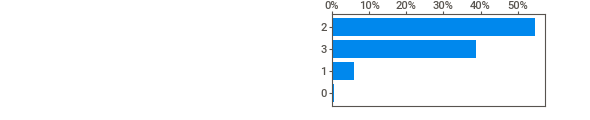
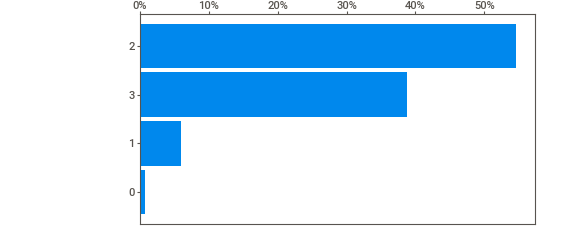
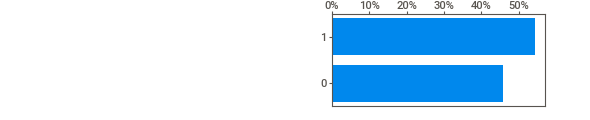
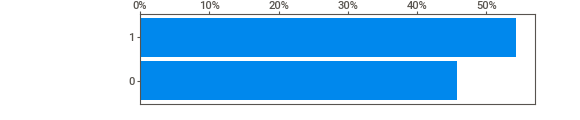
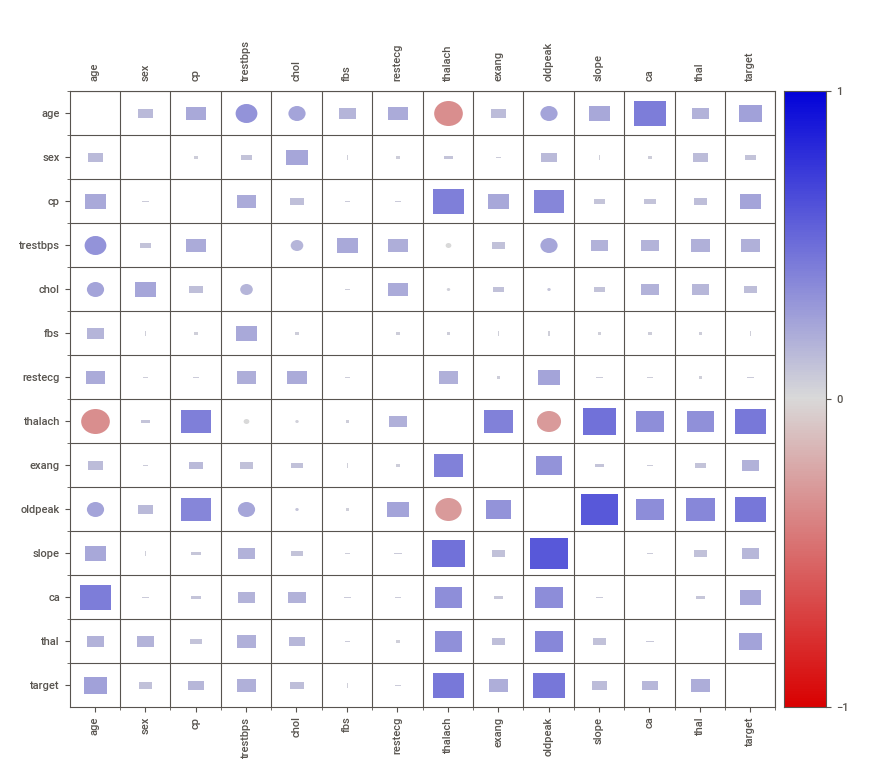
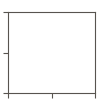

In [89]:
report.show_notebook()

In [90]:
x=df.drop(columns='target')

In [91]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1    3     145     233   1      0       150      0      2.3     
1    37    1    2     130     250   0      1       187      0      3.5     
2    41    0    1     130     204   0      0       172      0      1.4     
3    56    1    1     120     236   0      1       178      0      0.8     
4    57    0    0     120     354   0      1       163      1      0.6     
5    57    1    0     140     192   0      1       148      0      0.4     
6    56    0    1     140     294   0      0       153      0      1.3     
7    44    1    1     120     263   0      1       173      0      0.0     
8    52    1    2     172     199   1      1       162      0      0.5     
9    57    1    2     150     168   0      1       174      0      1.6     
10   54    1    0     140     239   0      1       160      0      1.2     
11   48    0    2     130     275   0      1       139      0      0.2     
12   49    1    1     130     266   0      1       171      0      0.6     
13   64    1    3     110     211   0      0       144      1      1.8     
14   58    0    3     150     283   1      0       162      0      1.0     
15   50    0    2     120     219   0      1       158      0      1.6     
16   58    0    2     120     340   0      1       172      0      0.0     
17   66    0    3     150     226   0      1       114      0      2.6     
18   43    1    0     150     247   0      1       171      0      1.5     
19   69    0    3     140     239   0      1       151      0      1.8     
20   59    1    0     135     234   0      1       161      0      0.5     
21   44    1    2     130     233   0      1       179      1      0.4     
22   42    1    0     140     226   0      1       178      0      0.0     
23   61    1    2     150     243   1      1       137      1      1.0     
24   40    1    3     140     199   0      1       178      1      1.4     
25   71    0    1     160     302   0      1       162      0      0.4     
26   59    1    2     150     212   1      1       157      0      1.6     
27   51    1    2     110     175   0      1       123      0      0.6     
28   65    0    2     140     417   1      0       157      0      0.8     
29   53    1    2     130     197   1      0       152      0      1.2     
30   41    0    1     105     198   0      1       168      0      0.0     
31   65    1    0     120     177   0      1       140      0      0.4     
32   44    1    1     130     219   0      0       188      0      0.0     
33   54    1    2     125     273   0      0       152      0      0.5     
34   51    1    3     125     213   0      0       125      1      1.4     
35   46    0    2     142     177   0      0       160      1      1.4     
36   54    0    2     135     304   1      1       170      0      0.0     
37   54    1    2     150     232   0      0       165      0      1.6     
38   65    0    2     155     269   0      1       148      0      0.8     
39   65    0    2     160     360   0      0       151      0      0.8     
40   51    0    2     140     308   0      0       142      0      1.5     
41   48    1    1     130     245   0      0       180      0      0.2     
42   45    1    0     104     208   0      0       148      1      3.0     
43   53    0    0     130     264   0      0       143      0      0.4     
44   39    1    2     140     321   0      0       182      0      0.0     
45   52    1    1     120     325   0      1       172      0      0.2     
46   44    1    2     140     235   0      0       180      0      0.0     
47   47    1    2     138     257   0      0       156      0      0.0     
48   53    0    2     128     216   0      0       115      0      0.0     
49   53    0    0     138     234   0      0       160      0      0.0     
50   51    0    2     130     256   0      0       149      0      0.5     
51   66    1    0     120     302   0      0       15

In [92]:
y=df['target']

In [93]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [95]:
from sklearn import tree

In [96]:
clf=tree.DecisionTreeClassifier()

In [97]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
y_pred=clf.predict(x_test)

In [99]:
from sklearn.model_selection import *

In [100]:
accuracy_score(y_test,y_pred)

0.7362637362637363

In [101]:
confusion_matrix(y_test,y_pred)

array([[30, 11],
       [13, 37]])

In [102]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [104]:
print(" train accuracy : ",accuracy_score(y_train_pred,y_train))
print(" test accuracy : ",accuracy_score(y_test_pred,y_test))

 train accuracy :  1.0
 test accuracy :  0.7362637362637363


In [115]:
c_parameter_name='max_depth'
c_parameter_values=[1,2,3,4,5,6,7,8,9,10]
df= pd.DataFrame(columns=[c_parameter_name,'accuracy'])

for input_parameter in c_parameter_values:
  dt=tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
  dt.fit(x_train,y_train)
  y_pred=dt.predict(x_test)
  a=accuracy_score(y_test,y_pred)
  #df=df.concat({c_parameter_name:input_parameter,'accuracy':a},ignore_index=True)

  print(input_parameter ," = ", a)


1  =  0.6923076923076923
2  =  0.7582417582417582
3  =  0.7362637362637363
4  =  0.7692307692307693
5  =  0.7692307692307693
6  =  0.7142857142857143
7  =  0.7582417582417582
8  =  0.7032967032967034
9  =  0.7692307692307693
10  =  0.7692307692307693


In [116]:
from sklearn.model_selection import *

In [121]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1,2,3,4,5,6, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')
grid_param = {'criterion': ['gini', 'entropy'],
             'max_depth': [None,10,20,30],
             'min_samples_split': [2,10,20],
             'min_samples_leaf': [1,5,10]}


In [122]:
grid_param
grid_search = GridSearchCV(estimator=dt, param_grid=grid_param, cv=5,scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_*100)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print('Test_accuracy:', test_accuracy*100)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation accuracy: 79.12513842746401
Test_accuracy: 72.52747252747253


In [123]:
!pip install scikit-learn matplotlib graphviz

In [124]:
y=y.astype(str)

In [126]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [125]:
class_names=y.unique()

In [127]:
class_names

array(['1', '0'], dtype=object)

In [129]:
import graphviz

In [ ]:
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=x.columns,class_names=class_names,filled='True',rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)


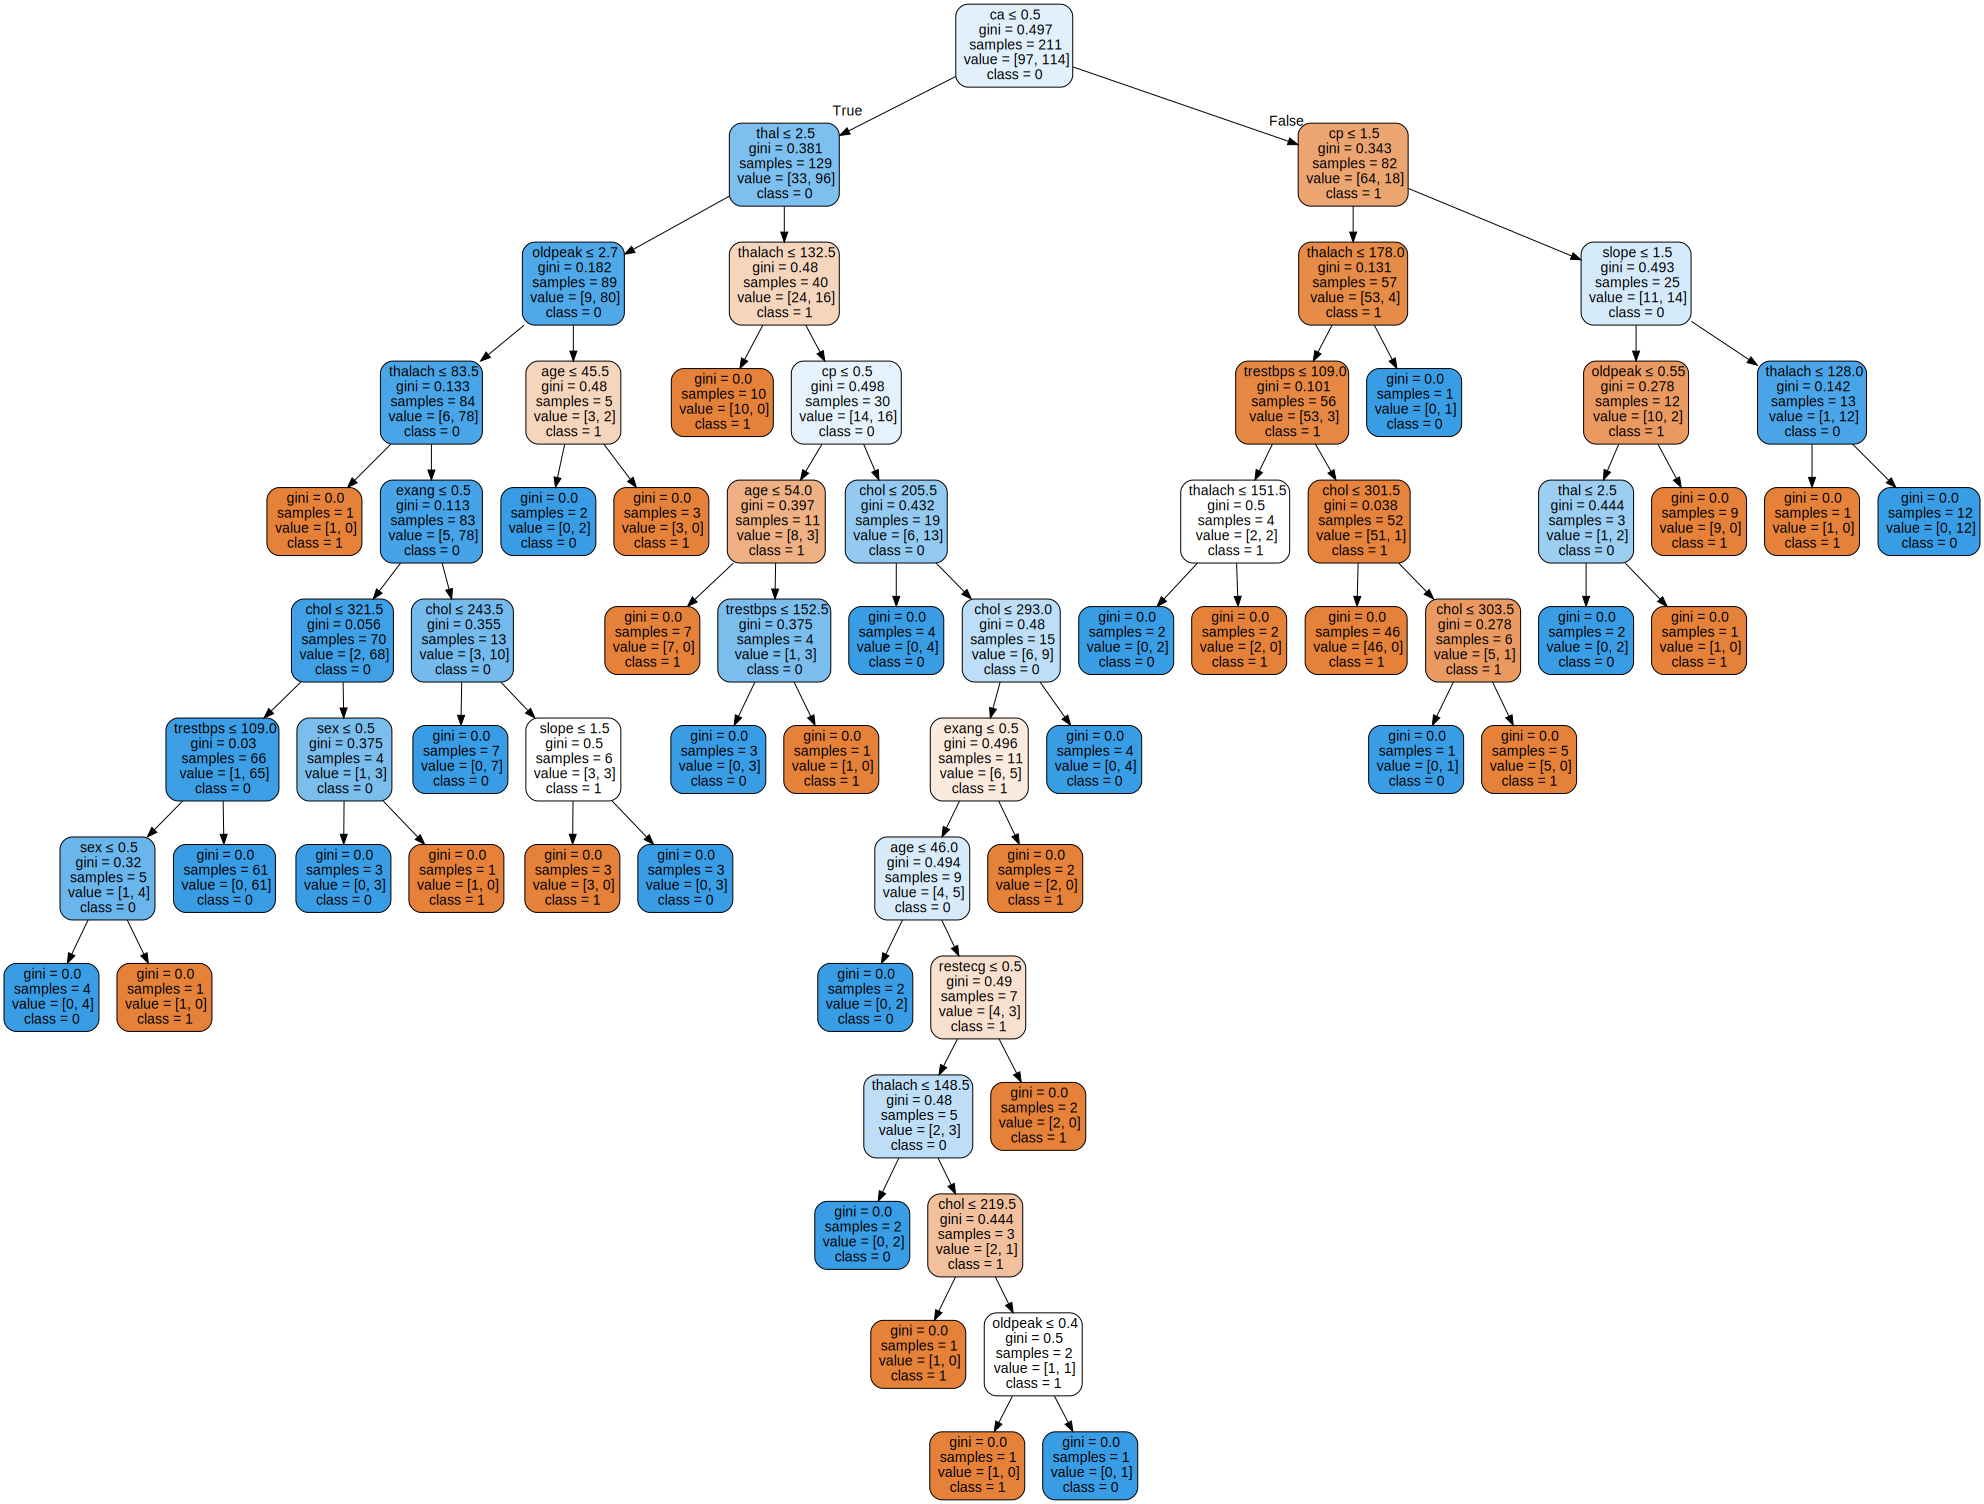

In [134]:
graph

In [ ]:
https://miro.com/welcomeonboard/ZXpaZGh2a1pualdFcnZDbnZQTWFhR0RsQkZMYWUxZWdrQlRzelVuS0hFM3l4VlpvTlM2dkluVXVlb3ZYNGtSeHwzNDU4NzY0NTgzMTg4Mzg2NzU5fDI=?share_link_id=310856620750